<a href="https://colab.research.google.com/github/GoAshim/Deep-Learning-with-TensorFlow/blob/main/03_Regression_Problem_with_TensorFlow_Predict_Premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving Regression Problem with Neural Networks using TensorFlow
In this project we will use neural networks in TensorFlow with a simple dataset to predict a numerical variable (or target feature) based on one or more other variables (input features). The scope of this project is to learn the fundamentals of neural network in tensorflow by going through
the steps to build and train the model and use the model to predict result with unknown data.

In [9]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Check version of tensorflow
tf.__version__

'2.15.0'

### Loading data
In this project we will import the medical insurance cost data of 1338 random individuals. This data is publicly available in GitHub in form of a comma separated value (CSV) file.

In [11]:
# Load the data
ins = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Data Dictionary
The data has 1338 records with 7 column or features. The features are -

* **age**: Age of primary beneficiary
* **sex**: Gender, female or male
* **bmi**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Primary beneficiary a smoker, yes or no.
* **region**: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical insurance premium billed by health insurance.

### Exploratory Data Analysis
In this step we will review the dataframe and analyze the features.

In [13]:
# Shape of the dataframe
print("Number of rows / records: ", ins.shape[0])
print("Number of columns / features: ", ins.shape[1])

Number of rows / records:  1338
Number of columns / features:  7


In [18]:
# Check the datatypes of each columns of the dataframe
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
# Review statistical analysis of the numeric columns, such as age, sex, children and charges
ins.select_dtypes(include=np.number).describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


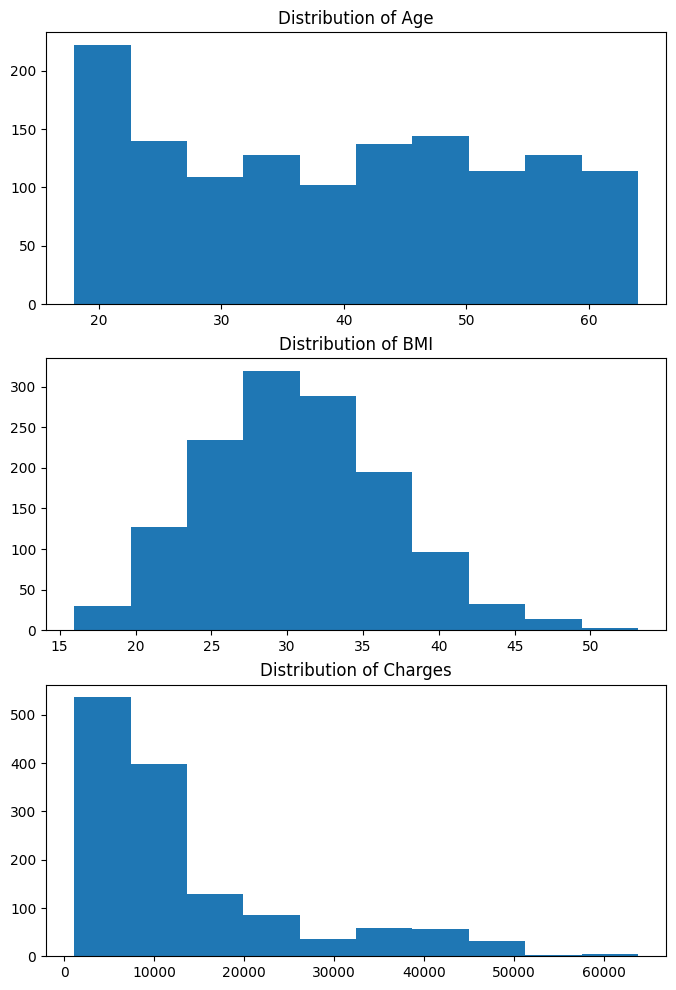

In [37]:
# Plot histogram of age, bmi and charges features to see the distribution and find any outlier.

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

ax[0].hist(ins['age'])
ax[0].set(title="Distribution of Age")
ax[1].hist(ins['bmi'])
ax[1].set(title="Distribution of BMI")
ax[2].hist(ins['charges'])
ax[2].set(title="Distribution of Charges");

### Creating deep learning model with TensorFlow
We are going to run the following steps -
* **Creating the model** - We will create the model by defining the following of a neural network model.
  * Input layer
  * Output layer
  * Hidden layer(s) - One or more layers in between the input and output layer.
* **Compiling the model** - We will compile the model by defining the following of a neural network model.
  * Loss function - This tells our model how much wrong it is.
  * Optimizer - This tells our model how to reduce the loss, in other words how to improve it's performance.
  * Evaluation metrics - Helps to evaluate performance of the model.
* **Fitting the model** - We will run the model with data and let it find pattern between feature(s) and target. Here we will specify -
  * Epoch - The number of times the model will run on data to find the pattern.

In [8]:
# Set the random seed
tf.random.set_seed(42)

# Create a sequential model and one dense layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss = tf.keras.losses.mae, # mae = Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit

(<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 TensorShape([2, 3]),
 TensorShape([8]),
 2,
 1)